<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
- Rodrigo Martínez Gallardo Bertoldi
- Pablo Alejandro Rivera Sánchez

**Fecha:** 4 de mayo del 2021.

**Expediente** : 
- 
- 722268
- 721005
    
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 10: Clase 24.

[Liga al repositorio](https://github.com/rodrigomart1nez/ProyectoConjunto_RMartinez_PRivera)

### Proyecto Conjunto.
> Instrucciones: Cada estudiante debe proponer una solución óptima a los problemas planteados a continuación.

# Tarea
Realizar la valuación de las opciones barrera para las acciones de Microsoft, siguiendo los siguientes lineamientos:
1. Realizar la valuación para el tipo de opción barrera 'CALL'- down-and-out, usando la suposición de rendimientos normales y usando el método del histograma. Para ambas valuaciones, comparar los resultados de la evaluación obtenida con los resultados obtenidos por la valuación Europea. Como se realizó en clase.
2. Repetir el inciso anterior pero en esta ocasión para el caso de 'PUT'- Up-and-out.

**Nota:** Analice los datos descargados y según el método ya sea `down-and-out` o `Up-and-out` defina un strike price usando la volatility smile vista en la clase de opciones europeas y basado en el spot price y el strike defina una barrera adecuada.

Se habilitará un enlace en canvas para subir un cuaderno de python, con la solución.

**Criterio de revisión.**

> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

### _Solución Rodrigo._

In [3]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

####### Calculation of log-returns
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()

In [4]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.neighbors import KernelDensity
import datetime
from datetime import datetime, timedelta
import scipy.stats as st
import scipy as sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [10]:
closes = get_adj_closes(['MSFT'], '2017-01-01')
closes_msft = closes.loc[:,'MSFT']
closes_msft

Date
2017-01-03     58.538
2017-01-04     58.276
2017-01-05     58.276
2017-01-06     58.782
2017-01-09     58.595
               ...   
2021-04-28    254.560
2021-04-29    252.510
2021-04-30    252.180
2021-05-03    251.860
2021-05-04    247.790
Name: MSFT, Length: 1091, dtype: float64

In [11]:
ret_msft = calc_daily_ret(closes_msft)

In [12]:
pd.set_option('display.max_rows', 10)

msft = web.YahooOptions('MSFT')
msft_opt = msft.get_all_data().reset_index()
msft_opt.set_index('Expiry').sort_index()#.head(1000)

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-05-07,212.5,put,MSFT210507P00212500,...,2021-05-04 20:00:02,2021-05-04 19:38:21,"{'contractSymbol': 'MSFT210507P00212500', 'str..."
2021-05-07,310.0,call,MSFT210507C00310000,...,2021-05-04 20:00:02,2021-05-03 18:19:38,"{'contractSymbol': 'MSFT210507C00310000', 'str..."
2021-05-07,310.0,put,MSFT210507P00310000,...,2021-05-04 20:00:02,2021-05-04 18:22:27,"{'contractSymbol': 'MSFT210507P00310000', 'str..."
2021-05-07,235.0,call,MSFT210507C00235000,...,2021-05-04 20:00:02,2021-05-04 18:45:01,"{'contractSymbol': 'MSFT210507C00235000', 'str..."
2021-05-07,235.0,put,MSFT210507P00235000,...,2021-05-04 20:00:02,2021-05-04 19:59:45,"{'contractSymbol': 'MSFT210507P00235000', 'str..."
...,...,...,...,...,...,...,...
2023-06-16,120.0,put,MSFT230616P00120000,...,2021-05-04 20:00:02,2021-04-21 14:36:50,"{'contractSymbol': 'MSFT230616P00120000', 'str..."
2023-06-16,295.0,call,MSFT230616C00295000,...,2021-05-04 20:00:02,2021-05-03 18:58:50,"{'contractSymbol': 'MSFT230616C00295000', 'str..."
2023-06-16,295.0,put,MSFT230616P00295000,...,2021-05-04 20:00:02,2021-05-03 13:39:26,"{'contractSymbol': 'MSFT230616P00295000', 'str..."


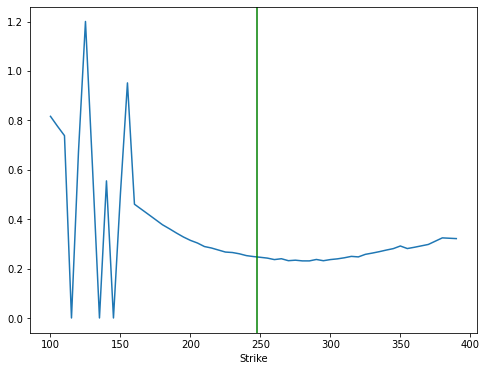

In [85]:
opt_plot = msft_opt.loc[(msft_opt.Type=='call') & (msft_opt.Expiry=='2021-09-17')]

ax = opt_plot.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(opt_plot.Underlying_Price.iloc[0], color='g');

In [89]:
opt_deseada = msft_opt.loc[(msft_opt.Type=='call') & (msft_opt.Strike==275) & (msft_opt.Expiry=='2021-09-17')]
opt_deseada

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
1259,275.0,2021-09-17,call,MSFT210917C00275000,4.6,4.6,5.1,-0.99,-17.71,53.0,7367.0,0.234,MSFT,False,MSFT,247.79,2021-05-04 20:00:02,2021-05-04 18:54:04,"{'contractSymbol': 'MSFT210917C00275000', 'str..."


In [90]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar

Strike                                                            275
Expiry                                            2021-09-17 00:00:00
Type                                                             call
Symbol                                            MSFT210917C00275000
Last                                                              4.6
                                          ...                        
Underlying                                                       MSFT
Underlying_Price                                                  248
Quote_Time                                        2021-05-04 20:00:02
Last_Trade_Date                                   2021-05-04 18:54:04
JSON                {'contractSymbol': 'MSFT210917C00275000', 'str...
Name: 1259, Length: 19, dtype: object

In [91]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT210917C00275000',
 'strike': 275.0,
 'currency': 'USD',
 'lastPrice': 4.6,
 'change': -0.99000025,
 'percentChange': -17.710201,
 'volume': 53,
 'openInterest': 7367,
 'bid': 4.6,
 'ask': 5.1,
 'contractSize': 'REGULAR',
 'expiration': 1631836800,
 'lastTradeDate': 1620154444,
 'impliedVolatility': 0.2339248971557617,
 'inTheMoney': False}

#### Valuación de opción europea

In [92]:
mu = ret_msft.mean()
sigma = ret_msft.std()
r = 0.006/360
mu, sigma, r

(0.0013237599382196934, 0.017990847783153525, 1.6666666666666667e-05)

In [93]:
from datetime import date

# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_msft.iloc[-1]
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

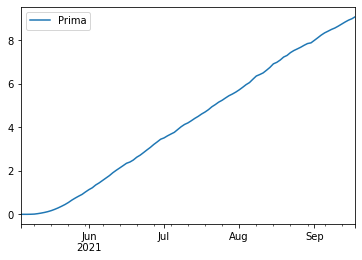

In [94]:
strike = K
call=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes - strike, 0).mean(axis=1)}, index=dates)
call.plot();

In [95]:
call.iloc[-1]

Prima    9.078
Name: 2021-09-17 00:00:00, dtype: float64

In [96]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(8.204291589588868, 9.952373456770468)


In [97]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT210917C00275000',
 'strike': 275.0,
 'currency': 'USD',
 'lastPrice': 4.6,
 'change': -0.99000025,
 'percentChange': -17.710201,
 'volume': 53,
 'openInterest': 7367,
 'bid': 4.6,
 'ask': 5.1,
 'contractSize': 'REGULAR',
 'expiration': 1631836800,
 'lastTradeDate': 1620154444,
 'impliedVolatility': 0.2339248971557617,
 'inTheMoney': False}

Histograma

In [98]:
# Centro mis datos en mi tasa libre de riesgo
freq, values = np.histogram(ret_msft-mu+r, bins=10000)
# freq = freq.astype('float32')
prob = freq/np.sum(freq)

In [99]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_msft.iloc[-1]

ret = np.random.choice(values[1:], (ndays,nscen), p=prob)
sim_ret_hist = pd.DataFrame(ret, index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())

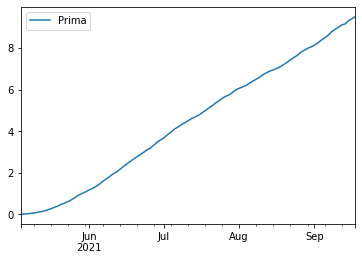

In [100]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)
call_hist=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes_hist-strike,np.zeros([ndays,nscen])).T.mean()},index=dates)
call_hist.plot();

In [101]:
call_hist.iloc[-1]

Prima    9.504
Name: 2021-09-17 00:00:00, dtype: float64

In [102]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = call_hist.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(8.62002058039856, 10.388117564780917)


In [103]:
opt_valuar['JSON']['lastPrice']

4.6

Valuación de opción barrera

normal

In [104]:
mu = ret_msft.mean()
sigma = ret_msft.std()
r = 0.006/360
mu, sigma, r

(0.0013237599382196934, 0.017990847783153525, 1.6666666666666667e-05)

In [105]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start = today, end = expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_msft.iloc[-1]

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
S0

247.7899932861328

In [106]:
K, S0

(275.0, 247.7899932861328)

* Down-and-out call: Sí $S_0>B$, $C_t^{do}=\max\{S_T-K,0\}I(S_t>B)$

In [107]:
pd.set_option('display.max_columns', 35)

# Función de desactivación (knock-out)
# Si en algún momento el precio toca la barrera la opción se desactiva
I = (sim_closes > B).cumprod(axis=0)  > 0
I

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-05-04,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2021-05-05,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2021-05-06,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True
2021-05-07,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True
2021-05-10,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,False,True,True,True,True,False,False,True,False,True,True,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,True
2021-09-14,False,True,True,True,True,False,False,True,False,True,True,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False
2021-09-15,False,True,True,True,True,False,False,True,False,True,True,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False
2021-09-16,False,True,True,True,True,False,False,True,False,True,True,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False


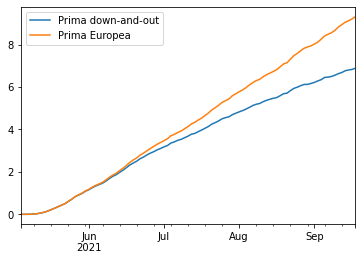

In [108]:
# Definir barrera
B = 235
# Crear función indicadora
I = (sim_closes > B).cumprod(axis=0)  > 0
# Definir strike
strike = K
# Calcular la prima de una opción Europea
call = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(sim_closes - strike, 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
calldo = pd.DataFrame({'Prima down-and-out':np.exp(-r*ndays)*(I * np.fmax(sim_closes - strike, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = calldo.plot();
call.plot(ax=ax);

In [109]:
call.iloc[-1]

Prima Europea    9.318
Name: 2021-09-17 00:00:00, dtype: float64

In [110]:
calldo.iloc[-1]

Prima down-and-out    6.887
Name: 2021-09-17 00:00:00, dtype: float64

# Up-n-out PUT

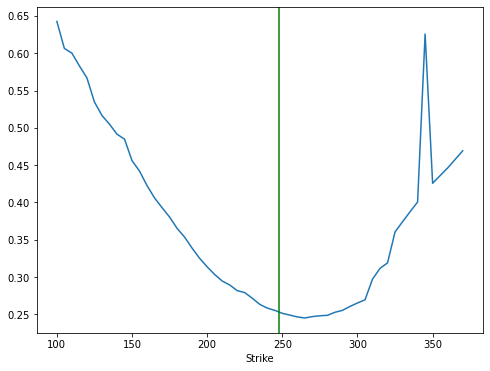

In [112]:
opt_plot = msft_opt.loc[(msft_opt.Type=='put') & (msft_opt.Expiry=='2021-09-17')]

ax = opt_plot.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(opt_plot.Underlying_Price.iloc[0], color='g');

In [114]:
opt_deseada = msft_opt.loc[(msft_opt.Type=='put') & (msft_opt.Strike==245) & (msft_opt.Expiry=='2021-09-17')]
opt_deseada

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
977,245.0,2021-09-17,put,MSFT210917P00245000,14.1,13.4,14.0,2.1,17.5,94.0,3557.0,0.255,MSFT,False,MSFT,247.79,2021-05-04 20:00:02,2021-05-04 19:55:01,"{'contractSymbol': 'MSFT210917P00245000', 'str..."


In [115]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar

Strike                                                            245
Expiry                                            2021-09-17 00:00:00
Type                                                              put
Symbol                                            MSFT210917P00245000
Last                                                             14.1
                                          ...                        
Underlying                                                       MSFT
Underlying_Price                                                  248
Quote_Time                                        2021-05-04 20:00:02
Last_Trade_Date                                   2021-05-04 19:55:01
JSON                {'contractSymbol': 'MSFT210917P00245000', 'str...
Name: 977, Length: 19, dtype: object

In [116]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT210917P00245000',
 'strike': 245.0,
 'currency': 'USD',
 'lastPrice': 14.1,
 'change': 2.1000004,
 'percentChange': 17.500002,
 'volume': 94,
 'openInterest': 3557,
 'bid': 13.4,
 'ask': 14.0,
 'contractSize': 'REGULAR',
 'expiration': 1631836800,
 'lastTradeDate': 1620158101,
 'impliedVolatility': 0.2553175054931641,
 'inTheMoney': False}

#### Valuación de opción europea

In [117]:
mu = ret_msft.mean()
sigma = ret_msft.std()
r = 0.006/360
mu, sigma, r

(0.0013237599382196934, 0.017990847783153525, 1.6666666666666667e-05)

In [118]:
from datetime import date

# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_msft.iloc[-1]
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

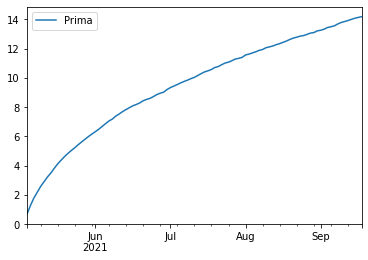

In [119]:
strike = K
put=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike - sim_closes, 0).mean(axis=1)}, index=dates)
put.plot();

In [120]:
put.iloc[-1]

Prima    14.189
Name: 2021-09-17 00:00:00, dtype: float64

In [121]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(13.306619523450607, 15.070815016116228)


In [122]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT210917P00245000',
 'strike': 245.0,
 'currency': 'USD',
 'lastPrice': 14.1,
 'change': 2.1000004,
 'percentChange': 17.500002,
 'volume': 94,
 'openInterest': 3557,
 'bid': 13.4,
 'ask': 14.0,
 'contractSize': 'REGULAR',
 'expiration': 1631836800,
 'lastTradeDate': 1620158101,
 'impliedVolatility': 0.2553175054931641,
 'inTheMoney': False}

Histograma

In [123]:
# Centro mis datos en mi tasa libre de riesgo
freq, values = np.histogram(ret_msft-mu+r, bins=10000)
# freq = freq.astype('float32')
prob = freq/np.sum(freq)

In [124]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_msft.iloc[-1]

ret = np.random.choice(values[1:], (ndays,nscen), p=prob)
sim_ret_hist = pd.DataFrame(ret, index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())

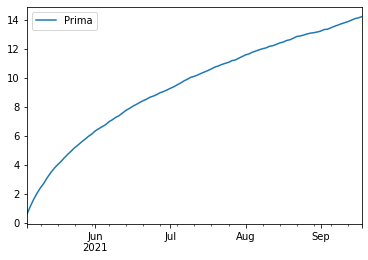

In [125]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)
put_hist=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros([ndays,nscen])).T.mean()},index=dates)
put_hist.plot();

In [126]:
put_hist.iloc[-1]

Prima    14.208
Name: 2021-09-17 00:00:00, dtype: float64

In [127]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(13.315057776366066, 15.100080941495468)


In [128]:
opt_valuar['JSON']['lastPrice']

14.1

Valuación de opción barrera

normal

In [129]:
mu = ret_msft.mean()
sigma = ret_msft.std()
r = 0.006/360
mu, sigma, r

(0.0013237599382196934, 0.017990847783153525, 1.6666666666666667e-05)

In [130]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start = today, end = expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_msft.iloc[-1]

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
S0

247.7899932861328

In [131]:
K, S0

(245.0, 247.7899932861328)

* Up-and-out put: Sí $S_0<B$, $P_t^{uo}=\max\{K-S_T,0\}I(S_t<B)$

In [132]:
pd.set_option('display.max_columns', 35)

# Función de desactivación (knock-out)
# Si en algún momento el precio toca la barrera la opción se desactiva
I = (sim_closes < B).cumprod(axis=0)  > 0
I

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-05-04,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-05-05,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-05-06,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-05-07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-05-10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-09-14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-09-15,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-09-16,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


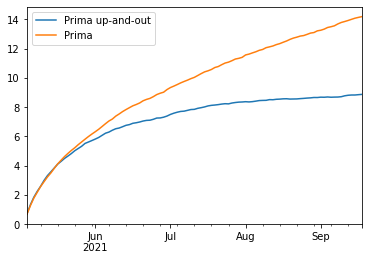

In [137]:
# Definir barrera
B = 260
# Crear función indicadora
I = (sim_closes < B).cumprod(axis=0)  > 0
# Definir strike
strike = K
# Calcular la prima de una opción Europea
pu = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(strike - sim_closes, 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
putuo = pd.DataFrame({'Prima up-and-out':np.exp(-r*ndays)*(I * np.fmax(strike - sim_closes, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = putuo.plot();
put.plot(ax=ax);

In [134]:
put.iloc[-1]

Prima    14.189
Name: 2021-09-17 00:00:00, dtype: float64

In [135]:
put.iloc[-1]

Prima    14.189
Name: 2021-09-17 00:00:00, dtype: float64

### _Solución Pablo._